In [1]:
%load_ext autoreload
%autoreload 2
from glob import glob
import os
from pathlib import Path
import re
import sys
import yaml
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from func.utils import get_categorical_features, read_pkl_gzip, to_pkl_gzip, parallel_load_data, get_filename, logger_func
from ieee_train import eval_train, eval_check_feature
from kaggle_utils import reduce_mem_usage, move_feature
logger = logger_func()

2019-09-22 08:08:35,843 func.utils 347 [INFO]    [logger_func] start 


In [2]:
COLUMN_ID = 'TransactionID'
COLUMN_DT = 'TransactionDT'
COLUMN_TARGET = 'isFraud'
COLUMN_GROUP = 'DT-M'
COLUMNS_IGNORE = [COLUMN_ID, COLUMN_DT, COLUMN_TARGET, COLUMN_GROUP, 'is_train', 'date']

def filter_feature(path):
    if path.count(''):
        return True
    else:
        return False

# paths_train = glob('../submit/lb9516/*_train.gz')
# paths_test  = glob('../submit/lb9516/*_test.gz')
# paths_train += glob('../feature/raw_use/is*_train.gz')
# paths_test  += glob('../feature/raw_use/is*_test.gz')
# paths_train += glob('../feature/raw_use/TransactionID_train.gz')
# paths_test  += glob('../feature/raw_use/TransactionID_test.gz')
# paths_train = glob('../submit/sub_valid/*_train.gz')
# paths_test  = glob('../submit/sub_valid/*_test.gz')
paths_train = glob('../submit/re_sub/*_train.gz')
paths_test  = glob('../submit/re_sub/*_test.gz')
paths_train += glob('../submit/add_feature/*_train.gz')
paths_test  += glob('../submit/add_feature/*_test.gz')
paths_train += glob('../feature/valid_use/531*_train.gz')
paths_test  += glob('../feature/valid_use/531*_test.gz')
paths_train += glob('../feature/valid_use/532*_train.gz')
paths_test  += glob('../feature/valid_use/532*_test.gz')
# paths_train += glob('../feature/valid_trush/532*uid3*_train.gz')
# paths_test  += glob('../feature/valid_trush/532*uid3*_test.gz')

# for path in paths_train:
#     if path.count('C14_ratio'):
#         paths_train.remove(path)
        
# for path in paths_test:
#     if path.count('C14_ratio'):
#         paths_test.remove(path)
    
# paths_train = glob('../feature/raw_use/*_train.gz')
# paths_test = glob('../feature/raw_use/*_test.gz')
# paths_train = [path for path in paths_train if filter_feature(path) ]
# paths_test = [path for path in paths_test if filter_feature(path) ]

# paths_train_feature = sorted(glob('../feature/org_use/*_train.gz'))
# paths_test_feature  = sorted(glob('../feature/org_use/*_test.gz'))

# paths_train_feature += sorted(glob('../feature/valid/*_train.gz'))
# paths_test_feature  += sorted(glob('../feature/valid/*_test.gz'))

# paths_train_feature += sorted(glob('../feature/kernel/*_train.gz'))
# paths_test_feature  += sorted(glob('../feature/kernel/*_test.gz'))

# paths_train_feature = sorted(glob('../feature/valid_use/*_train.gz'))
# paths_test_feature  = sorted(glob('../feature/valid_use/*_test.gz'))
paths_train_feature = []
paths_test_feature  = []

# df_train = reduce_mem_usage( parallel_load_data(paths_train) )
# df_test  = reduce_mem_usage( parallel_load_data(paths_test) )
df_train = parallel_load_data(paths_train)
df_test  = parallel_load_data(paths_test)
Y = df_train[COLUMN_TARGET]
df_train.drop(COLUMN_TARGET, axis=1, inplace=True)

In [3]:
# df_user_id_bear = pd.read_csv('../output/same_user_pattern/20190901_user_ids_share.csv').set_index(COLUMN_ID)

# df_train.set_index(COLUMN_ID, inplace=True)
# df_train['user_id_bear'] = df_user_id_bear['predicted_user_id']
# df_train.reset_index(inplace=True)

# df_test.set_index(COLUMN_ID, inplace=True)
# df_test['user_id_bear'] = df_user_id_bear['predicted_user_id']
# df_test.reset_index(inplace=True)

2019-09-22 08:09:45,603 func.utils 111 [INFO]    [<module>] * EXP: dataset new_set (590540, 790) lr 0.05  


  * Diff Features: 0
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.927741
[400]	valid_0's auc: 0.929873
Early stopping, best iteration is:
[398]	valid_0's auc: 0.929947


2019-09-22 08:12:37,397 func.utils 140 [INFO]    [ieee_cv]   * Fold0 2017-12: 0.9299466421165979 | Bear's...PB:0.9820113938527351 PV:0.97912975521789 All:0.9800917421347835 


[  * Fold0 Validation-DT-M 2017-12: 134339] done in 167 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.95487
Early stopping, best iteration is:
[242]	valid_0's auc: 0.955701
[  * Fold1 Validation-DT-M 2018-3: 101968] done in 113 s


2019-09-22 08:14:34,253 func.utils 140 [INFO]    [ieee_cv]   * Fold1 2018-3: 0.9557012217229445 | Bear's...PB:0.9608768302429952 PV:0.9655929747499377 All:0.9645296496978257 


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.959414
Early stopping, best iteration is:
[251]	valid_0's auc: 0.959976


2019-09-22 08:16:20,165 func.utils 140 [INFO]    [ieee_cv]   * Fold2 2018-1: 0.9599760903863624 | Bear's...PB:0.9732005752743657 PV:0.9704973002747088 All:0.9715369004048886 


[  * Fold2 Validation-DT-M 2018-1: 92510] done in 101 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.949429
[400]	valid_0's auc: 0.95007
Early stopping, best iteration is:
[354]	valid_0's auc: 0.950681


2019-09-22 08:18:38,024 func.utils 140 [INFO]    [ieee_cv]   * Fold3 2018-5: 0.9506814226127602 | Bear's...PB:0.9445556171788991 PV:0.9526662199284985 All:0.9506658833139842 


[  * Fold3 Validation-DT-M 2018-5: 92427] done in 134 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.959664
[400]	valid_0's auc: 0.961684
[600]	valid_0's auc: 0.962227
Early stopping, best iteration is:
[644]	valid_0's auc: 0.962452


2019-09-22 08:22:15,210 func.utils 140 [INFO]    [ieee_cv]   * Fold4 2018-2: 0.9624524007678209 | Bear's...PB:0.9817263693940737 PV:0.9825741415785764 All:0.9820665554681438 


[  * Fold4 Validation-DT-M 2018-2: 85725] done in 214 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.965772
[400]	valid_0's auc: 0.967148
Early stopping, best iteration is:
[313]	valid_0's auc: 0.967428


2019-09-22 08:24:18,295 func.utils 140 [INFO]    [ieee_cv]   * Fold5 2018-4: 0.967428419787716 | Bear's...PB:0.9640560405589804 PV:0.9611903525606167 All:0.9622310662382372 


[  * Fold5 Validation-DT-M 2018-4: 83571] done in 119 s
[  * Make Prediction Result File.] done in 50 s
* Check Corr with Past Submit.
  *  (506691,) (506691,)
  * LB0.9515 / 0.001791862907536567
  *  (506691,) (506691,)
  * LB0.9545 / 0.9584275825340771
  *  (506691,) (506691,)
  * LB0.9561 / 0.9268425096193227
* CV: 0.954364366232367 | BestIter: 367.0
* Training Feature Importance


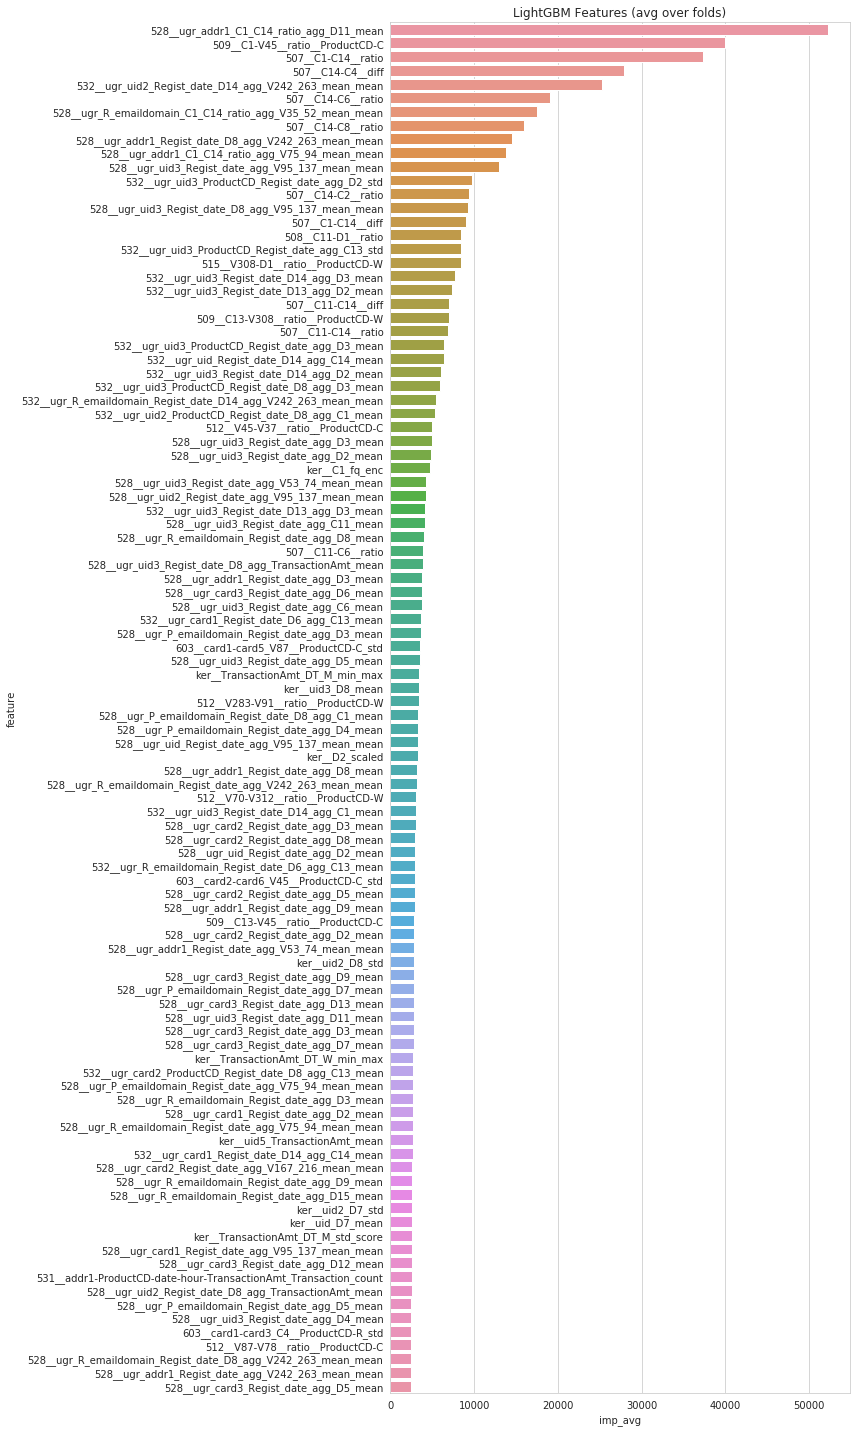

Setup Dataset dim_ml_dataset.


In [4]:
is_submit = [True, False][0]
has_dec = [True, False][0]
n_splits = 6
set_type = 'new_set'

valid_paths_train = paths_train_feature[:]
valid_paths_test  = paths_test_feature[:]

#========================================================================
# pathの存在チェック。なぜかたびたびFileNotFoundErrorが起きるので,,,
#========================================================================
remove_paths = []
for trn_path, tes_path in zip(valid_paths_train, valid_paths_test):
    if os.path.exists(trn_path) and os.path.exists(tes_path):
        pass
    else:
        remove_paths.append(trn_path)
        remove_paths.append(tes_path)
for path in remove_paths:
    if path.count('train'):
        valid_paths_train.remove(path)
        print(f'remove {path}')
    elif path.count('test'):
        valid_paths_test.remove(path)
        print(f'remove {path}')

if len(valid_paths_train):
    df_feat_train = parallel_load_data(valid_paths_train)
    df_feat_test  = parallel_load_data(valid_paths_test)
    
    col_drops = eval_check_feature(df_feat_train, df_feat_test)
    
    tmp_train = df_train.join(df_feat_train)
    tmp_test = df_test.join(df_feat_test)
else:
    tmp_train = df_train
    tmp_test = df_test

#========================================================================
# Train Test で片方に存在しないFeatureを除外
#========================================================================
diff_cols = list(set(tmp_train.columns) - set(tmp_test.columns))

for col in list(set(diff_cols)):
    from_dir = 'valid'
    to_dir = 'valid_trush'
    move_feature([col], from_dir, to_dir)
tmp_train.drop(diff_cols, axis=1, inplace=True)
print(f"  * Diff Features: {len(diff_cols)}")

# same_user_path = '../output/same_user_pattern/20190901_user_ids_share.csv'
# same_user_path = '../output/same_user_pattern/0902__same_user_id__card_addr_pemail_M.csv'
group_kfold_path = '../input/0908_ieee__DT-M_GroupKFold.gz'
group = read_pkl_gzip(group_kfold_path)
tmp_train[COLUMN_GROUP] = group

# 2017-12抜いてみる
# if not has_dec:
#     tmp_train = tmp_train[tmp_train[COLUMN_GROUP]!='2017-12']
#     Y = Y.loc[tmp_train.index]
#     n_splits = 5


#========================================================================
# Features elimination 
#==============================================================
# from scipy.stats import ks_2samp
# features_check = []
# columns_to_check = set(list(tmp_train)).difference(COLUMNS_IGNORE)
# for i in columns_to_check:
#     features_check.append(ks_2samp(tmp_test[i], tmp_train[i])[1])

# features_check = pd.Series(features_check, index=columns_to_check).sort_values() 
# features_discard = list(features_check[features_check==0].index)
# print(features_discard)
# tmp_train.drop(features_discard, axis=1, inplace=True)
# tmp_test.drop(features_discard, axis=1, inplace=True)


model_type = "lgb"
params = {
#     'n_jobs': 60,
    'n_jobs': 96,
#     'n_jobs': 84,
#     'n_jobs': 48,
#     'n_jobs': 36,
    'objective': 'binary',
    'num_leaves': 2**8-1,
    'max_depth': -1,
    'subsample': 0.7,
    'subsample_freq': 1,
    'colsample_bytree' : 0.20,
    'lambda_l1' : 0.1,
    'lambda_l2' : 1.0,
    'learning_rate' : 0.1,
    "early_stopping_rounds": 50,
    "seed": 1208,
    "bagging_seed": 1208,
    "feature_fraction_seed": 1208,
    "drop_seed": 1208,
    'n_splits': n_splits,
    'metric': 'auc',
    'model_type': model_type,
    'fold': ['stratified', 'group'][1],
}
if is_submit:
    params['learning_rate'] = 0.01
    params['learning_rate'] = 0.05
    params["early_stopping_rounds"] = 100

logger.info(f"* EXP: dataset {set_type} {tmp_train.shape} lr {params['learning_rate']} ")

list_result_feim = eval_train(
    logger,
    tmp_train,
    Y,
    tmp_test,
    COLUMN_GROUP,
    model_type,
    params,
    is_adv=[True, False][1],
    is_viz=[True, False][0],
)
feim = list_result_feim[0]

In [5]:
feim = list_result_feim[0]
# feim = read_pkl_gzip('../output/feature_importances/20190922_0227__CV0-953443367765578__feature1142.gz')
key1 = '532_'
key2 = ''
idx = [col for col in feim.index if col.count(key1) and col.count(key2)]
feim = feim.loc[idx]
feim.head()

,imp_fold1,imp_fold2,imp_fold3,imp_fold4,imp_fold5,imp_fold6,imp_avg
feature,,,,,,,
532__ugr_uid2_ProductCD_Regist_date_D8_agg_V242_263_mean_mean,48173.066406,44391.847656,43120.101562,47175.800781,45266.664062,47236.718750,45894.031250
532__ugr_uid3_Regist_date_D13_agg_D3_mean,6584.653809,2594.862305,11192.560547,11335.612305,11074.094727,7059.945801,8306.954102
532__ugr_uid3_ProductCD_Regist_date_agg_D3_mean,4616.939941,4175.796387,6944.129883,12648.443359,6374.672852,9230.311523,7331.715332
532__ugr_uid3_ProductCD_Regist_date_agg_D2_std,3919.975586,5060.634766,5433.907715,7827.504395,5652.459473,4850.143555,5457.437500
532__ugr_uid2_ProductCD_Regist_date_D8_agg_C1_mean,1727.160645,6235.556641,4133.614746,3463.834473,2798.440674,7958.694336,4386.216797


In [6]:
# feim = read_pkl_gzip('../output/feature_importances/20190909_2324__CV0-9467296784440689__feature552.gz')
for feature_name in feim[feim['imp_avg']<2000].index:
    
    if not feature_name.count('532__'):
        continue

    if feature_name.count('raw'):
        from_dir = 'raw_use'
        to_dir = 'raw_trush'
#         from_dir = 'raw_trush'
#         to_dir = 'raw_use'
    else:
        from_dir = 'org_use'
        to_dir = 'org_trush'
#         from_dir = 'org_trush'
#         to_dir = 'org_use'
#     from_dir = 'product_feature'
#     from_dir = 'kernel'
#     from_dir = 'check_trush'
#     from_dir = 'raw_trush'
#     from_dir = 'raw_use'
#     from_dir = 'org_trush'
#     from_dir = 'useless'
    from_dir = '../submit/re_sub/'
#     from_dir = 'org_use'
    from_dir = 'valid_use'
#     to_dir = '../submit/trush/'
    to_dir = 'valid_trush'
#     to_dir = 'raw_trush'
#     to_dir = 'check_trush'
#     to_dir = 'org_use'
#     to_dir = 'useless'
#     to_dir = 'valid'
#     to_dir = 'kernel'
    try:
        print(feature_name)
        move_feature([feature_name], from_dir, to_dir)
    except FileNotFoundError:
        print(feature_name)

532__ugr_uid2_Regist_date_D14_agg_C13_mean
532__ugr_uid3_ProductCD_Regist_date_agg_D2_mean
532__ugr_uid3_Regist_date_D14_agg_D2_std
532__ugr_uid3_Regist_date_D13_agg_TransactionAmt_mean
532__ugr_uid3_ProductCD_Regist_date_D8_agg_D2_std
532__ugr_uid3_Regist_date_D6_agg_D2_mean
532__ugr_R_emaildomain_Regist_date_D6_agg_C1_std
532__ugr_uid3_Regist_date_D14_agg_C13_std
532__ugr_uid3_Regist_date_D14_agg_D11_mean
532__ugr_uid3_Regist_date_D6_agg_C13_std
532__ugr_uid3_Regist_date_D6_agg_C13_mean
532__ugr_addr1_ProductCD_Regist_date_agg_D15_std
532__ugr_card1_Regist_date_D14_agg_V242_263_mean_mean
532__ugr_card3_ProductCD_Regist_date_agg_D3_std
532__ugr_card3_Regist_date_D13_agg_D5_std
532__ugr_uid3_Regist_date_D15_agg_TransactionAmt_std
532__ugr_addr1_Regist_date_D13_agg_D4_std
532__ugr_R_emaildomain_ProductCD_Regist_date_agg_V242_263_mean_std
532__ugr_R_emaildomain_ProductCD_Regist_date_D8_agg_C13_mean
532__ugr_R_emaildomain_ProductCD_Regist_date_agg_D5_mean
532__ugr_uid3_Regist_date_D14_agg

In [11]:
# sub = pd.read_csv('../submit/lb/20190909_2324__CV0-9467296784440689__feature552.csv')
# sub = pd.read_csv('../submit/lb/20190917_0022__CV0-947676__BearAUC0-9631.csv')
# sub = pd.read_csv('../submit/tmp/20190917_0825__CV0-9486992730843505__feature750.csv')
# sub = pd.read_csv('../submit/tmp/20190917_0947__CV0-9454660522014052__feature750.csv')
# sub = pd.read_csv('../submit/tmp/20190917_1107__CV0-9485055333319241__feature686.csv')
sub = pd.read_csv('../submit/tmp/20190920_1002__CV0-9505750228407942__feature994.csv')
sub[COLUMN_ID] = sub[COLUMN_ID].astype('int')
sub.head()

,TransactionID,isFraud
0,3663549,0.000495
1,3663550,0.000919
2,3663551,0.000627
3,3663552,0.000943
4,3663553,0.000530


In [12]:
from sklearn.metrics import roc_auc_score
bear = pd.read_csv('../input/20190913_ieee__bear_probing.csv').iloc[:, [0, 3, 4, 6]]
bear = bear[bear[COLUMN_TARGET]==-1]
bear = bear.iloc[:, [0,1,3]]
sub.columns = [COLUMN_ID, 'pred']
bear.columns = [COLUMN_ID, 'data_type', COLUMN_TARGET]
bear_score = sub.merge(bear, how='inner', on=COLUMN_ID)
public = bear_score[bear_score['data_type']=='test_public']
private = bear_score[bear_score['data_type']=='test_private']


public_score = roc_auc_score(public[COLUMN_TARGET].values, public['pred'].values)
private_score = roc_auc_score(private[COLUMN_TARGET].values, private['pred'].values)
all_score = roc_auc_score(bear_score[COLUMN_TARGET].values, bear_score['pred'].values)
print(public_score, private_score, all_score)

0.9693337434518601 0.9597681288570636 0.9637032059110936


In [2]:
feim = read_pkl_gzip('../output/feature_importances/20190920_1351__CV0-9534658757641309__feature1190.gz')
# pd.set_option('max_rows', 200)
# feim = list_result_feim[0]
print(feim.shape)
# idx = [idx for idx in feim.index if idx.count('522_')]
# feim = feim.loc[idx]
feim.tail(50)
# feim.loc[[i for i in feim.index if i.count('browser')]]

(1190, 7)


,imp_fold1,imp_fold2,imp_fold3,imp_fold4,imp_fold5,imp_fold6,imp_avg
feature,,,,,,,
ker__V242,47.774681,4.338970,157.266205,25.605141,16.049654,41.456802,48.748577
526__V226_230_max,22.176426,55.315231,53.842461,34.148781,29.509571,95.777603,48.461674
526__V3_4_5_9_11_std,37.532028,50.733662,95.086105,12.702540,42.304096,50.577877,48.156052
526__V35_52_sum,52.651798,61.228378,20.721521,21.287121,56.446484,75.927711,48.043839
515__V281-D7__ratio__ProductCD-C,18.076248,44.716400,58.564159,120.377441,11.641709,33.174541,47.758419
ker__C7_fq_enc,41.392582,18.879320,8.857655,124.174248,47.684486,40.963020,46.991882
526__V2_11_std,36.242226,45.175713,43.775230,10.490940,59.599934,60.088589,42.562107
526__V53_74_pro,41.066399,9.237090,35.865799,100.957336,0.000000,32.664398,36.631836
516__P_emaildomain_bin_anonymous_dummie,10.870800,82.834084,54.781380,0.000000,45.428070,2.191230,32.684261


In [9]:
feim[feim['imp_avg']<2000].shape

(688, 7)